In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Cargo los dataframe y los mergeo

In [ ]:
train_tran = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/train_transaction.csv',encoding='Latin-1')
train_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/train_identity.csv',encoding='Latin-1')

In [ ]:
train = train_tran.merge(train_id, on='TransactionID', how='left')

In [ ]:
train.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,debit,204.0,87.0,19.0,NaN,yahoo.com,NaN,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0,12.0,2.0,61.0,61.0,30.0,318.0,30.0

Elimino los dataframe que ya no uso para ahorrar RAM y cargo los DF de test y os mergeo

In [ ]:
del train_tran, train_id

In [ ]:
test_tran = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/test_transaction.csv',encoding='Latin-1')
tes_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/test_identity.csv',encoding='Latin-1')

In [ ]:
test = test_tran.merge(tes_id, on='TransactionID', how='left')

In [ ]:
del test_tran,tes_id

Renombro las columna de test para que queden de igual nombre las columnas de ambos DF

In [ ]:
test.rename(columns={'id-01':'id_01', 'id-02':'id_02', 'id-03':'id_03', 'id-04':'id_04', 'id-05':'id_05',
                        'id-06':'id_06', 'id-07':'id_07', 'id-08':'id_08', 'id-09':'id_09', 'id-10':'id_10',
                        'id-11':'id_11', 'id-12':'id_12', 'id-13':'id_13', 'id-14':'id_14', 'id-15':'id_15',
                        'id-16':'id_16', 'id-17':'id_17', 'id-18':'id_18', 'id-19':'id_19', 'id-20':'id_20',
                        'id-21':'id_21', 'id-22':'id_22', 'id-23':'id_23', 'id-24':'id_24', 'id-25':'id_25',
                        'id-26':'id_26', 'id-27':'id_27', 'id-28':'id_28', 'id-29':'id_29', 'id-30':'id_30',
                        'id-31':'id_31', 'id-32':'id_32', 'id-33':'id_33', 'id-34':'id_34', 'id-35':'id_35',
                        'id-36':'id_36', 'id-37':'id_37', 'id-38':'id_38'},inplace=True)

In [ ]:
text_col=[x for x in train.columns if train[x].dtype=="object"]

Saco los NaN y los modifico por un 0 y en los features que son textos, cambio el 0 por la palabra NaN

In [ ]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [ ]:
def crea_nanValue(df,text_col):
    for i in text_col:
        df[i].replace(0,'NaN',inplace=True)

In [ ]:
crea_nanValue(train,text_col)

In [ ]:
crea_nanValue(test,text_col)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

Encondeo los DF con OrdinalEncoder

In [ ]:
enc=OrdinalEncoder()

In [ ]:
def encodear(df,text_col,enc):
    for k in text_col:
        df[text_col]=enc.fit_transform(df[text_col])

In [ ]:
encodear(train,text_col,enc)

In [ ]:
encodear(test,text_col,enc)

In [ ]:
train.drop(columns=['TransactionID'],inplace=True)

KeyError: ignored

Me guardo los id de test para poder hacer el submit

In [ ]:
id_test = test[['TransactionID']]

In [ ]:
test.drop(columns=['TransactionID'],inplace=True)

In [ ]:
features = ['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

In [ ]:
X=train[features]
Y=train['isFraud']

me guardo los csv encodeados

In [ ]:
train.to_csv('train_parte2.csv')
test.to_csv('test_parte2.csv')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/train_parte2.csv',encoding='Latin-1')

In [ ]:
train.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

Hago el split, y empiezo a entrenar para buscar el mejor hiperparametro

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
lr = LogisticRegression(random_state=10, solver='lbfgs', max_iter=20)

In [ ]:
param = {
                  'penalty': ['l2', 'none'],
                  'C': [0.1, 1, 10],
}


In [ ]:
cv = RandomizedSearchCV(lr, param_distributions=param, n_iter=20, random_state=10, scoring='roc_auc', n_jobs=1, verbose=100)

In [ ]:
cv.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=0.1, penalty=l2...........................................
[CV 1/5; 1/6] END ............C=0.1, penalty=l2;, score=0.454 total time=  13.8s
[CV 2/5; 1/6] START C=0.1, penalty=l2...........................................
[CV 2/5; 1/6] END ............C=0.1, penalty=l2;, score=0.449 total time=  10.9s
[CV 3/5; 1/6] START C=0.1, penalty=l2...........................................
[CV 3/5; 1/6] END ............C=0.1, penalty=l2;, score=0.456 total time=  11.6s
[CV 4/5; 1/6] START C=0.1, penalty=l2...........................................
[CV 4/5; 1/6] END ............C=0.1, penalty=l2;, score=0.462 total time=  10.9s
[CV 5/5; 1/6] START C=0.1, penalty=l2...........................................
[CV 5/5; 1/6] END ............C=0.1, penalty=l2;, score=0.448 total time=  11.1s
[CV 1/5; 2/6] START C=0.1, penalty=none.........................................
[CV 1/5; 2/6] END ..........C=0.1, penalty=none;,

RandomizedSearchCV(estimator=LogisticRegression(max_iter=20, random_state=10),
                   n_iter=20, n_jobs=1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'penalty': ['l2', 'none']},
                   random_state=10, scoring='roc_auc', verbose=100)

busco el mejor hiperparametro y me fijo el score

In [ ]:
cv.best_estimator_

LogisticRegression(C=0.1, max_iter=20, random_state=10)

In [ ]:
cv.score(x_train,y_train)

0.4535470799353067

In [ ]:
cv.predict_proba(x_train)

array([[0.88439536, 0.11560464],
       [0.93101921, 0.06898079],
       [0.82808981, 0.17191019],
       ...,
       [0.66922701, 0.33077299],
       [0.98862175, 0.01137825],
       [0.98532712, 0.01467288]])

In [ ]:
validation = train.loc[0:(0.3 * len(train.index)), :]

In [ ]:
train = train.loc[(0.3 * len(train.index)):len(train.index), :]

In [ ]:
x_train=train.drop(columns=['isFraud'])
y_train=train[['isFraud']]

In [ ]:
cv_2 = RandomizedSearchCV(lr, param_distributions=param, n_iter=20, random_state=10, scoring='roc_auc', n_jobs=1, verbose=100)

In [ ]:
cv_2.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=0.1, penalty=l2...........................................
[CV 1/5; 1/6] END ............C=0.1, penalty=l2;, score=0.669 total time=  15.0s
[CV 2/5; 1/6] START C=0.1, penalty=l2...........................................
[CV 2/5; 1/6] END ............C=0.1, penalty=l2;, score=0.713 total time=  12.3s
[CV 3/5; 1/6] START C=0.1, penalty=l2...........................................
[CV 3/5; 1/6] END ............C=0.1, penalty=l2;, score=0.720 total time=  11.8s
[CV 4/5; 1/6] START C=0.1, penalty=l2...........................................
[CV 4/5; 1/6] END ............C=0.1, penalty=l2;, score=0.692 total time=  12.7s
[CV 5/5; 1/6] START C=0.1, penalty=l2...........................................
[CV 5/5; 1/6] END ............C=0.1, penalty=l2;, score=0.635 total time=  12.0s
[CV 1/5; 2/6] START C=0.1, penalty=none.........................................
[CV 1/5; 2/6] END ..........C=0.1, penalty=none;,

RandomizedSearchCV(estimator=LogisticRegression(max_iter=20, random_state=10),
                   n_iter=20, n_jobs=1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'penalty': ['l2', 'none']},
                   random_state=10, scoring='roc_auc', verbose=100)

In [ ]:
cv_2.best_estimator_

LogisticRegression(C=0.1, max_iter=20, penalty='none', random_state=10)

In [ ]:
print(classification_report(y_train, cv_2.predict(x_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    397741
           1       0.20      0.00      0.01     15637

    accuracy                           0.96    413378
   macro avg       0.58      0.50      0.49    413378
weighted avg       0.93      0.96      0.94    413378



In [ ]:
roc_auc_score(y_train, cv_2.predict_proba(x_train)[:, 1])

0.5660890723553698

In [ ]:
x_test=validation.drop(columns=['isFraud'])
y_test=validation[['isFraud']]

In [ ]:
print(classification_report(y_test, cv_2.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94    172137
           1       0.05      0.17      0.08      5026

    accuracy                           0.89    177163
   macro avg       0.51      0.54      0.51    177163
weighted avg       0.95      0.89      0.92    177163



In [ ]:
roc_auc_score(y_test, cv_2.predict_proba(x_test)[:, 1])

0.5392638713459987

Uso el mejor estimador 

In [ ]:
lr_2=LogisticRegression(C=0.1, max_iter=20, penalty='none', random_state=10)

In [ ]:
lr_2.fit(x_train,y_train)

LogisticRegression(C=0.1, max_iter=20, penalty='none', random_state=10)

me fijo lso score de los features

In [ ]:
i=0
for x in x_train.columns:
  print('Feature: ',x,' Score: ',abs(lr_2.coef_[0][i]))
  i=i+1

Feature:  TransactionDT  Score:  3.741005347115411e-07
Feature:  TransactionAmt  Score:  1.9270878068795196e-09
Feature:  ProductCD  Score:  1.266078957570462e-10
Feature:  card1  Score:  2.023119801989314e-07
Feature:  card2  Score:  6.8963537944550225e-09
Feature:  card3  Score:  2.5946173778814873e-09
Feature:  card4  Score:  7.257576226299546e-11
Feature:  card5  Score:  4.2687428516754675e-09
Feature:  card6  Score:  6.614520625603715e-11
Feature:  addr1  Score:  8.509042827286636e-09
Feature:  addr2  Score:  2.6147717676378066e-09
Feature:  dist1  Score:  1.676407276567378e-09
Feature:  dist2  Score:  6.390983477294317e-10
Feature:  P_emaildomain  Score:  4.6540616665481165e-10
Feature:  R_emaildomain  Score:  2.5265165067749914e-10
Feature:  C1  Score:  3.459120732950796e-10
Feature:  C2  Score:  6.648103090735554e-10
Feature:  C3  Score:  2.2740481204703614e-13
Feature:  C4  Score:  2.7604061601064096e-10
Feature:  C5  Score:  3.2061201881503957e-10
Feature:  C6  Score:  8.6456

In [ ]:
scores=abs(lr_2.coef_[0])

In [ ]:
df_scores=pd.DataFrame(list(x_train.columns),columns=['feature'])

In [ ]:
df_scores['score']=scores

In [ ]:
df_scores.sort_values(by = ['score'], ascending=False,inplace=True)

features mas importantes

Text(0, 0.5, 'Score')

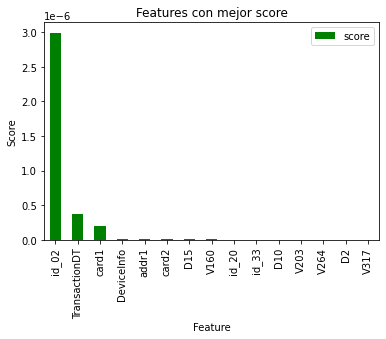

In [ ]:
ax = df_scores.head(15).plot.bar(x='feature',y='score',rot=90, color={'g'})
plt.title("Features con mejor score")
plt.xlabel("Feature")
plt.ylabel("Score")

In [ ]:
df_scores2 = df_scores

In [ ]:
df_scores2.drop(df_scores2.index[0],inplace=True)

Text(0, 0.5, 'Score')

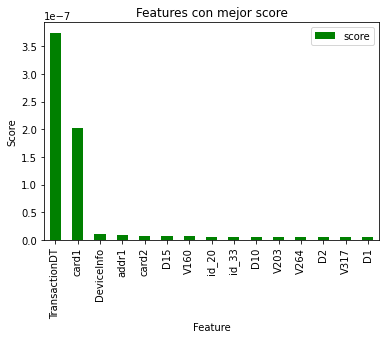

In [ ]:
ax2 = df_scores2.head(15).plot.bar(x='feature',y='score',rot=90, color={'g'})
plt.title("Features con mejor score")
plt.xlabel("Feature")
plt.ylabel("Score")

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/test_parte2.csv',encoding='Latin-1')

In [ ]:
test.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
pred=lr_2.predict_proba(test)

In [ ]:
pred

array([[9.98979857e-01, 1.02014331e-03],
       [9.98978606e-01, 1.02139410e-03],
       [9.98978665e-01, 1.02133526e-03],
       ...,
       [9.99997247e-01, 2.75252118e-06],
       [9.99997247e-01, 2.75253436e-06],
       [9.99978134e-01, 2.18655012e-05]])

In [ ]:
pred2=lr_2.predict_proba(test)[:,1]

In [ ]:
pred2

array([1.02014331e-03, 1.02139410e-03, 1.02133526e-03, ...,
       2.75252118e-06, 2.75253436e-06, 2.18655012e-05])

In [ ]:
to_kaggle=pd.DataFrame(list(pred2))

In [ ]:
test_tran = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/test_transaction.csv',encoding='Latin-1')
tes_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/test_identity.csv',encoding='Latin-1')

In [ ]:
test = test_tran.merge(tes_id, on='TransactionID', how='left')

In [ ]:
id_test = test[['TransactionID']]

In [ ]:
to_kaggle['id']=id_test

In [ ]:
to_kaggle=to_kaggle[['id',0]]

In [ ]:
to_kaggle

,id,0
0,3663549,0.001020
1,3663550,0.001021
2,3663551,0.001021
3,3663552,0.001020
4,3663553,0.001019
...,...,...
506686,4170235,0.000003
506687,4170236,0.000006
506688,4170237,0.000003
506689,4170238,0.000003


In [ ]:
to_kaggle.to_csv('submit_p2.csv',index=False)

In [ ]:
to_kaggle.to_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/submit_p2.csv',index=False)

SCORE en Kaggle:
Public score: 0.658139
Private score: 0.580941